In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('k-means-version1.csv')

In [3]:
df

,Unnamed: 0,Total_Visit_lowes_density,Total_Visit_density,income_density,family_density,store_type,Home_improvement_density,Total Visits_x,Population,income_label,home_label,lowes_label,incomeANDh
0,0,77.221740,34.651541,39.837464,0.846069,0.0,8.144958,471157,13597,2,1,1,2
1,1,34.805845,16.839954,16.672052,0.787671,0.0,4.515714,458653,27236,1,0,1,1
2,2,34.805845,20.591056,16.672052,0.787671,1.0,4.686701,560818,27236,0,0,1,1
3,3,29.583443,22.703406,11.538858,0.677201,0.0,2.639092,757204,33352,0,0,1,1
4,4,27.760665,22.691148,16.533976,0.822327,0.0,6.479659,710596,31316,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,0.000000,16.038571,19.236036,0.596458,1.0,2.948632,264460,16489,1,0,0,1
295,295,0.000000,8.012908,24.503019,0.767575,1.0,19.342124,201749,25178,1,2,0,0
296,296,14.198462,2.494089,30.433149,0.817459,1.0,5.112243,150855,60485,1,0,0,2
297,297,22.808054,3.706985,22.144571,0.786216,1.0,10.562764,127309,34343,1,0,1,1


In [4]:
df=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df

,Total_Visit_lowes_density,Total_Visit_density,income_density,family_density,store_type,Home_improvement_density,Total Visits_x,Population,income_label,home_label,lowes_label,incomeANDh
0,77.221740,34.651541,39.837464,0.846069,0.0,8.144958,471157,13597,2,1,1,2
1,34.805845,16.839954,16.672052,0.787671,0.0,4.515714,458653,27236,1,0,1,1
2,34.805845,20.591056,16.672052,0.787671,1.0,4.686701,560818,27236,0,0,1,1
3,29.583443,22.703406,11.538858,0.677201,0.0,2.639092,757204,33352,0,0,1,1
4,27.760665,22.691148,16.533976,0.822327,0.0,6.479659,710596,31316,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.000000,16.038571,19.236036,0.596458,1.0,2.948632,264460,16489,1,0,0,1
295,0.000000,8.012908,24.503019,0.767575,1.0,19.342124,201749,25178,1,2,0,0
296,14.198462,2.494089,30.433149,0.817459,1.0,5.112243,150855,60485,1,0,0,2
297,22.808054,3.706985,22.144571,0.786216,1.0,10.562764,127309,34343,1,0,1,1


In [54]:
# load prediction dataset
predict = pd.read_csv('predict_data.csv')
predict

,ZIPcode,Population,state,income_density,family_density,Total_Visit_lowes_density,store_type
0,37013,90073,TN,18.430950,0.811242,0.000000,0
1,37211,77960,TN,19.109056,0.745806,10.513417,0
2,37042,73433,TN,16.957499,0.882246,0.000000,0
3,34953,65295,FL,22.646742,0.889639,0.000000,0
4,32210,61928,FL,20.075717,0.820743,0.000000,0
...,...,...,...,...,...,...,...
1483,37116,0,0,0.000000,0.000000,0.000000,2
1484,37621,0,0,0.000000,0.000000,0.000000,2
1485,33736,0,0,0.000000,0.000000,0.000000,2
1486,33645,0,0,0.000000,0.000000,0.000000,2


In [48]:
x_predict = predict[['income_density','store_type','family_density']]
x_predict

,income_density,store_type,family_density
0,18.430950,0,0.811242
1,19.109056,0,0.745806
2,16.957499,0,0.882246
3,22.646742,0,0.889639
4,20.075717,0,0.820743
...,...,...,...
1483,0.000000,2,0.000000
1484,0.000000,2,0.000000
1485,0.000000,2,0.000000
1486,0.000000,2,0.000000


In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [38]:
# store without Lowe's model
X = df[['income_density','store_type','family_density']]
y = df["Total_Visit_density"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R^2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))

R^2:  0.5234075321758734
MSE:  98.64079376255076
MAE:  7.5238861463647755


In [41]:
# prediction
predict['visits_density'] = rf.predict(x_predict)
predict

,ZIPcode,Population,state,income_density,family_density,lowes_visit_density,store_type,visits_density
0,37013,90073,TN,18.430950,0.811242,0.000000,0,18.186178
1,37211,77960,TN,19.109056,0.745806,10.513417,0,20.223430
2,37042,73433,TN,16.957499,0.882246,0.000000,0,9.366523
3,34953,65295,FL,22.646742,0.889639,0.000000,0,11.476983
4,32210,61928,FL,20.075717,0.820743,0.000000,0,15.626643
...,...,...,...,...,...,...,...,...
1483,37116,0,0,0.000000,0.000000,0.000000,2,15.206772
1484,37621,0,0,0.000000,0.000000,0.000000,2,15.206772
1485,33736,0,0,0.000000,0.000000,0.000000,2,15.206772
1486,33645,0,0,0.000000,0.000000,0.000000,2,15.206772


In [44]:
df1 =df[df['Total_Visit_lowes_density']>0]

In [46]:
# stores with Lowe's model

X = df1[['income_density','store_type','family_density','Total_Visit_lowes_density']]
y = df1["Total_Visit_density"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R^2: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))

R^2:  0.5228684489502692
MSE:  25.06488697239502
MAE:  3.646048010310075


In [57]:
# prediction 
x_predict1 = predict[['income_density','store_type','family_density','Total_Visit_lowes_density']]
y_predict_lowes = rf.predict(x_predict1)

for i in range(len(predict)):
    if predict.iloc[i,5] > 0:
        predict.iloc[i,7] = y_predict_lowes[i]

predict

,ZIPcode,Population,state,income_density,family_density,Total_Visit_lowes_density,store_type
0,37013,90073,TN,18.430950,0.811242,0.000000,0
1,37211,77960,TN,19.109056,0.745806,8.485413,0
2,37042,73433,TN,16.957499,0.882246,0.000000,0
3,34953,65295,FL,22.646742,0.889639,0.000000,0
4,32210,61928,FL,20.075717,0.820743,0.000000,0
...,...,...,...,...,...,...,...
1483,37116,0,0,0.000000,0.000000,0.000000,2
1484,37621,0,0,0.000000,0.000000,0.000000,2
1485,33736,0,0,0.000000,0.000000,0.000000,2
1486,33645,0,0,0.000000,0.000000,0.000000,2


In [ ]:
predict['visits'] = predict['visits_density'] * predict['Population'] 
predict

In [ ]:
predict.to_csv('visit prediction')

Finished !

In [ ]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'prediction vs test (visit density)')

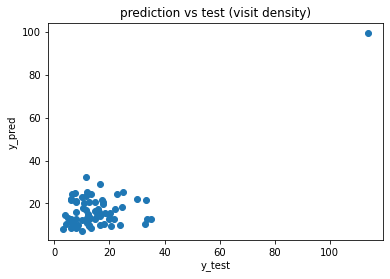

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('prediction vs test (visit density)')

In [ ]:
np.corrcoef(y_test, y_pred)

array([[1.        , 0.75851652],
       [0.75851652, 1.        ]])

In [ ]:
X_train.to_csv('X_train.csv')

In [ ]:
X_test.to_csv('X_test.csv') 

In [ ]:
y_train.to_csv('y_train.csv') 

In [ ]:
y_test.to_csv('y_test.csv') 